# Programming with Python - 4.Analyzing Data from Multiple Files
We now have almost everything we need to process all our data files. The only thing that’s missing is a library with a rather unpleasant name:

In [2]:
import glob

The glob library contains a function, also called glob, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character * matches zero or more characters, while ? matches any one character. We can use this to get the names of all the CSV files in the current directory:

In [3]:
print(glob.glob('data/inflammation*.csv'))

['data\\inflammation-01.csv', 'data\\inflammation-02.csv', 'data\\inflammation-03.csv', 'data\\inflammation-04.csv', 'data\\inflammation-05.csv', 'data\\inflammation-06.csv', 'data\\inflammation-07.csv', 'data\\inflammation-08.csv', 'data\\inflammation-09.csv', 'data\\inflammation-10.csv', 'data\\inflammation-11.csv', 'data\\inflammation-12.csv']


As these examples show, glob.glob’s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset. If we want to start by analyzing just the first three files in alphabetical order, we can use the sorted built-in function to generate a new sorted list from the glob.glob output:

data\inflammation-01.csv


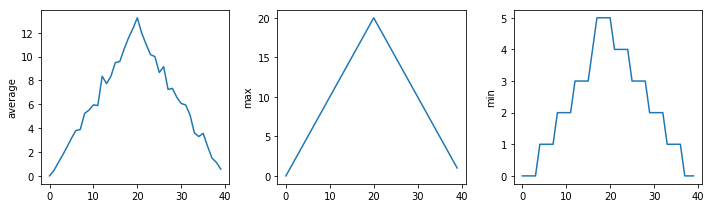

data\inflammation-02.csv


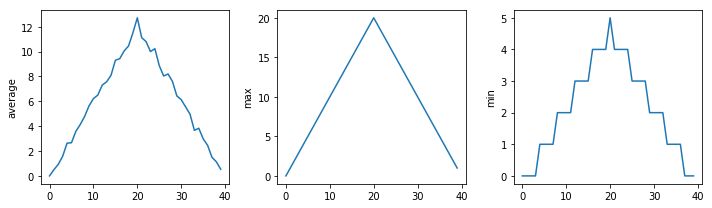

data\inflammation-03.csv


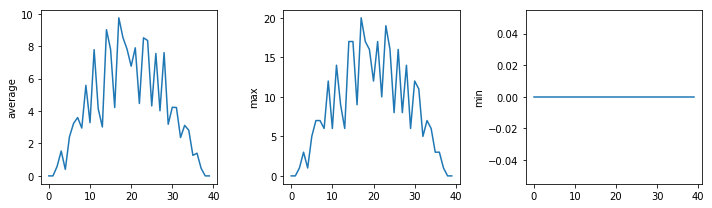

In [4]:
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Sure enough, the maxima of the first two data sets show exactly the same ramp as the first, and their minima show the same staircase structure; a different situation has been revealed in the third dataset, where the maxima are a bit less regular, but the minima are consistently zero.

# Plotting Differences
Plot the difference between the average of the first dataset and the average of the second dataset, i.e., the difference between the leftmost plot of the first two figures.

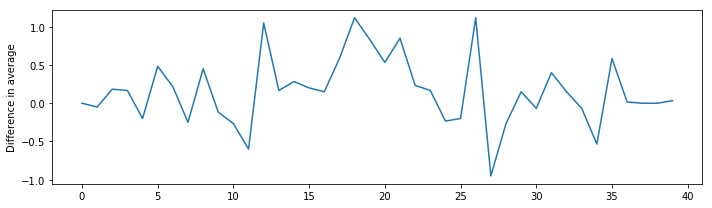

In [5]:
import glob
import numpy
import matplotlib.pyplot

filenames = glob.glob('data/inflammation*.csv')

data0 = numpy.loadtxt(fname=filenames[0], delimiter=',')
data1 = numpy.loadtxt(fname=filenames[1], delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

matplotlib.pyplot.ylabel('Difference in average')
matplotlib.pyplot.plot(data0.mean(axis=0) - data1.mean(axis=0))

fig.tight_layout()
matplotlib.pyplot.show()

# Generate Composite Statistics
Use each of the files once to generate a dataset containing values averaged over all patients:

In [6]:
filenames = glob.glob('data/inflammation*.csv')
composite_data = numpy.zeros((60,40))
for f in filenames:
    # sum each new file's data into as it's read
    #
    # and then divide the composite_data by number of samples
    composite_data /= len(filenames)

Then use pyplot to generate average, max, and min for all patients.

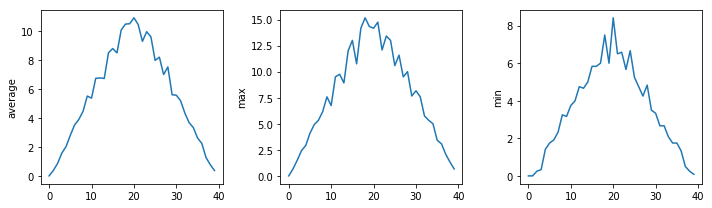

In [7]:
import glob
import numpy
import matplotlib.pyplot

filenames = glob.glob('data/inflammation*.csv')
composite_data = numpy.zeros((60,40))

for f in filenames:
    data = numpy.loadtxt(fname = f, delimiter=',')
    composite_data += data

composite_data/=len(filenames)

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(composite_data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

# Key Points
- Use glob.glob(pattern) to create a list of files whose names match a pattern.
- Use * in a pattern to match zero or more characters, and ? to match any single character.